<a href="https://colab.research.google.com/github/Busa-sathwika/NLP/blob/main/_assgn6_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data fromkeras.datasets and perform following computational analysis:- [CO3] (a) Preprocessing of the Data

(b) Divide data into training and testing data set

(c) Build the Gated Recurrent Units (GRU) Model

(d) Training the GRU Model

(e) Text Generation Using the Trained Model

(f) Evaluate Model’s accuracy

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 349ms/step - accuracy: 0.6890 - loss: 0.5560 - val_accuracy: 0.8472 - val_loss: 0.3506
Epoch 2/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 340ms/step - accuracy: 0.8990 - loss: 0.2594 - val_accuracy: 0.8338 - val_loss: 0.3857
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.8380 - loss: 0.3866
LSTM Model Accuracy: 0.8396
Epoch 1/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 58s 355ms/step - accuracy: 0.6335 - loss: 0.6230 - val_accuracy: 0.8348 - val_loss: 0.3713
Epoch 2/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 361ms/step - accuracy: 0.8795 - loss: 0.2923 - val_accuracy: 0.8420 - val_loss: 0.3730
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8409 - loss: 0.3735
GRU Model Accuracy: 0.8411


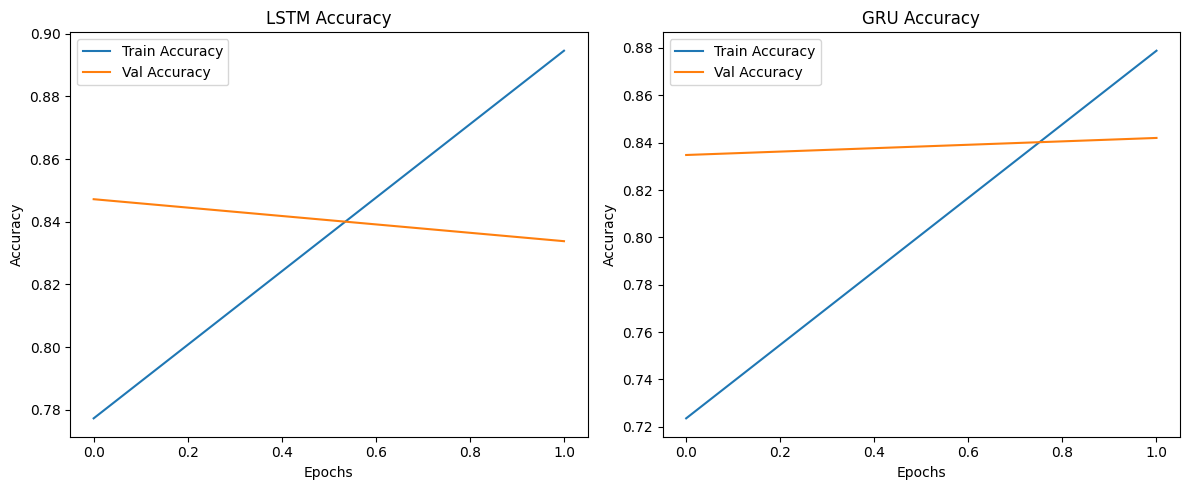

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

max_words = 10000
maxlen = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

def create_lstm_model():
    model = Sequential()
    model.add(Embedding(max_words, 128))
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_gru_model():
    model = Sequential()
    model.add(Embedding(max_words, 128))
    model.add(GRU(128))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(x_train, y_train, epochs=2, batch_size=128, validation_split=0.2)

lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test, y_test)
print(f'LSTM Model Accuracy: {lstm_accuracy:.4f}')

gru_model = create_gru_model()
gru_history = gru_model.fit(x_train, y_train, epochs=2, batch_size=128, validation_split=0.2)

gru_loss, gru_accuracy = gru_model.evaluate(x_test, y_test)
print(f'GRU Model Accuracy: {gru_accuracy:.4f}')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Val Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(gru_history.history['accuracy'], label='Train Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='Val Accuracy')
plt.title('GRU Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()